In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = linear_model.LinearRegression()
ground_temp = df[['Ground Temperature']]
chirps_sec = df[['Chirps/Second']]
lin_reg.fit(ground_temp, chirps_sec)

LinearRegression()

In [ ]:
print('intercept:', lin_reg.intercept_[0])
print('coefficient:', lin_reg.coef_[0,0])

intercept: 0.45931464523595267
coefficient: 0.20299973140771363


In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(lin_reg.coef_[0,0], lin_reg.intercept_[0]))

Linear Regression Equation: y = 0.2030 * x + 0.4593


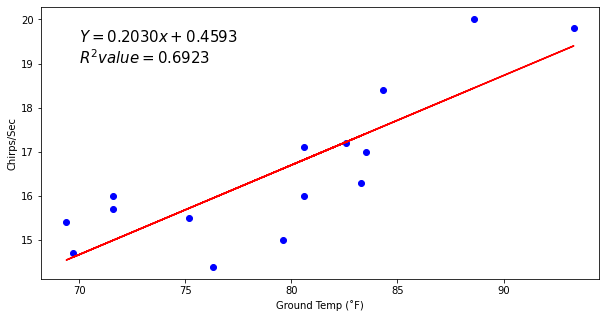

In [ ]:
from sklearn.metrics import r2_score
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.scatter(ground_temp, chirps_sec, color='blue') 
plt.plot(ground_temp, lin_reg.predict(ground_temp), color='red')
plt.text(70, 19.5, '$Y = %.4fx + %.4f$' % (lin_reg.coef_, lin_reg.intercept_), fontsize=15)
plt.text(70, 19, '$R^2 value = %.4f$'% r2_score(chirps_sec, lin_reg.predict(ground_temp)), fontsize=15)
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
print("R2_score:", r2_score(chirps_sec, lin_reg.predict(ground_temp)))

R2_score: 0.6922946529146998


**69% looks like an poor fit for the data and through linear regression line we can find that the points are diverse.**

In [ ]:
lin_reg.predict(np.array(95).reshape(1,-1))[0,0]

19.74428912896875

**Extrapolation: If the ground temperature reached 95˚F, the approximate chirping rate of crickets in chirps/sec is: 19.7443**

In [ ]:
def chirps_to_temp(y):
    x = (y - lin_reg.intercept_) / lin_reg.coef_[0]
    print(x)
chirps_to_temp(18)


[86.40743135]


**Intrapolation: When the chirping rate is 18 chirps/sec, the approximate ground temperature observed is 86.4˚F**

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
lin_reg1 = linear_model.LinearRegression()
body = df1[['Body']]
brain = df1[['Brain']]
lin_reg1.fit(body, brain)


LinearRegression()

In [ ]:
print('intercept:', lin_reg1.intercept_[0])
print('coefficient:', lin_reg1.coef_[0,0])


intercept: -56.85554542859637
coefficient: 0.9029129477287057


In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + ({:.4f})'.format(lin_reg1.coef_[0,0], lin_reg1.intercept_[0]))

Linear Regression Equation: y = 0.9029 * x + (-56.8555)


**Linear Regression Equation: y = 0.9029 * x + (-56.8555)**

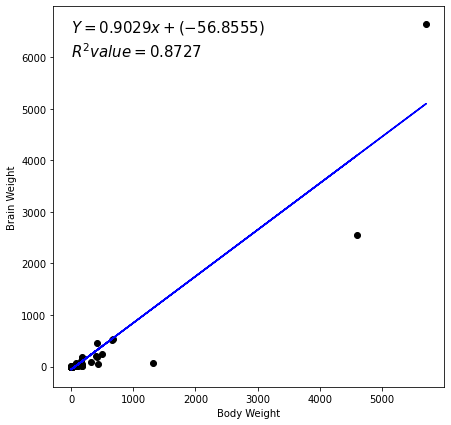

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(body, brain, color='black') 
plt.plot(body, lin_reg1.predict(body), color='blue')
plt.text(0, 6500, '$Y = %.4fx + (%.4f$)' % (lin_reg1.coef_, lin_reg1.intercept_), fontsize=15)
plt.text(0, 6000, '$R^2 value = %.4f$'% r2_score(brain, lin_reg1.predict(body)), fontsize=15)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
print("R2_score:", r2_score(brain, lin_reg1.predict(body)))

R2_score: 0.8726620843043331


**0.8727 is greater than 0.8, the equation is a good fit for the given data**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
input = df2[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
target = df2.Salary

In [ ]:
sal_linreg = linear_model.LinearRegression()
sal_linreg.fit(input, target)

all_inp = sal_linreg.score(input, target)
all_inp_coef = (sal_linreg.intercept_, sal_linreg.coef_)
print("R2 Score: ", all_inp)
print("Intercept & Coefficients: ", all_inp_coef)

R2 Score:  0.8547180674410969
Intercept & Coefficients:  (11410.14654725559, array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354]))


**R2 score for the equation with all columns(1-5) is 0.8547**

In [ ]:
df2.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


The correlation shows salary is correlated with Ysdeg, Rank, Year, Degree and sex.

In [ ]:
import itertools as it

In [ ]:
def lin_reg_focus(input, df, focus='Salary'):
    input_cols = df[input]
    focus_output = df[focus]
    lin_regr_sal = linear_model.LinearRegression()
    lin_regr_sal.fit(input_cols, focus_output)
    return lin_regr_sal.score(input_cols, focus_output)

In [ ]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [ ]:
combos = get_combos(input)

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_focus(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combo_scores = all_combo_scores(combos, df2)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

**The best result is 'Sex', 'Rank', 'Year', 'Degree', 'YSdeg' having R2 score of 0.8547**

**''Sex' factor as some correlation with salary but the score is nearer to zero indicating that it doesn't make much difference**